In [1]:
# importing libraries
import math
import numpy as np
import pandas as pd
import pandas_datareader as pdd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# Reading the stocks data of Yahoo from 2015 january to 2022 march 
df = pdd.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2022-03-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.714504
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.018261
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.020521
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.357342
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.293205
...,...,...,...,...,...,...
2022-03-25,175.279999,172.750000,173.880005,174.720001,80546200.0,174.720001
2022-03-28,175.729996,172.000000,172.169998,175.600006,90371900.0,175.600006
2022-03-29,179.009995,176.339996,176.690002,178.960007,100589400.0,178.960007


<function matplotlib.pyplot.show(close=None, block=None)>

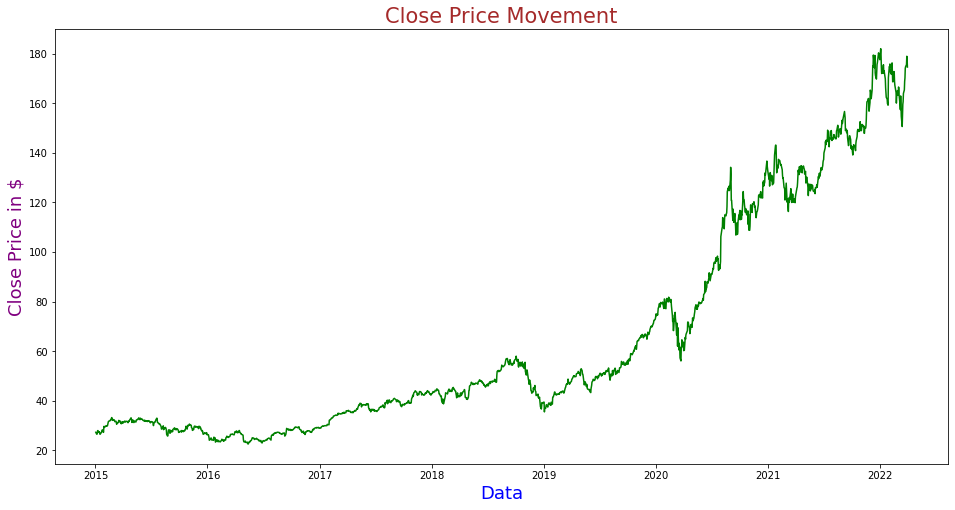

In [3]:
# plotting a graph for the visualisation of the selected dataset
plt.figure(figsize=(16,8))
plt.title('Close Price Movement', fontsize = 21,color='brown')
plt.plot(df["Close"],color='green')
plt.xlabel('Data',fontsize = 18,color='blue')
plt.ylabel('Close Price in $', fontsize = 18,color='purple')
plt.show

In [4]:
# Getting Closing Value Column
data = df.filter(['Close'])
dataset = data.values
len(dataset)

1825

In [5]:
# Selecting Training data (70% of the whole data)
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

1278

In [6]:
# Normalising the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0297789 ],
       [0.02494904],
       [0.02496473],
       ...,
       [0.98086882],
       [0.97340448],
       [0.95358323]])

In [7]:
#Specifying the shape of input (we will be using 60 observations of the samples in this case)
train_data = scaled_data[0:training_data_size, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)

[array([0.0297789 , 0.02494904, 0.02496473, 0.02730125, 0.03379333,
       0.03398151, 0.02965345, 0.03117454, 0.03051593, 0.02584288,
       0.02454132, 0.02882234, 0.03012389, 0.03459308, 0.0355026 ,
       0.03569077, 0.02948095, 0.03915635, 0.04478596, 0.04205741,
       0.04436256, 0.04439393, 0.04582092, 0.04641682, 0.044833  ,
       0.04607183, 0.04967853, 0.0541634 , 0.05664106, 0.05761331,
       0.05878941, 0.06018505, 0.05976165, 0.06140819, 0.06689667,
       0.06559511, 0.06029481, 0.06285087, 0.05977734, 0.06076525,
       0.06118866, 0.05990277, 0.05656266, 0.0568606 , 0.05770739,
       0.0535832 , 0.05002353, 0.0534891 , 0.05214051, 0.05427317,
       0.05755058, 0.05979302, 0.05827192, 0.05576291, 0.05781716,
       0.05700174, 0.0518112 , 0.0531598 , 0.05160735, 0.05649993])]
[0.053457746504823156]
[array([0.0297789 , 0.02494904, 0.02496473, 0.02730125, 0.03379333,
       0.03398151, 0.02965345, 0.03117454, 0.03051593, 0.02584288,
       0.02454132, 0.02882234, 0.03

In [8]:
# Converting x_train and y_train into numpy array for training the LSTM Model
x_train, y_train = np.array(x_train), np.array(y_train)
# Converting the data into 3D from 2D as LSTM works on 3D data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1218, 60, 1)

In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

2022-04-05 16:33:49.678861: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-05 16:33:49.769198: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-05 16:33:49.769942: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-05 16:33:49.771178: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
#callbacks = [EarlyStopping(monitor='val_accuracy', patience=3)]
model.fit(x_train,y_train, batch_size=1, epochs=8) #, validation_split = 0.2, callbacks=callbacks

2022-04-05 16:33:52.372702: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/8


2022-04-05 16:33:55.067550: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1218/1218 [==============================] - 12s 7ms/step - loss: 2.0618e-04
Epoch 2/8
1218/1218 [==============================] - 8s 6ms/step - loss: 1.0775e-04
Epoch 3/8
1218/1218 [==============================] - 9s 7ms/step - loss: 9.3252e-05
Epoch 4/8
1218/1218 [==============================] - 8s 7ms/step - loss: 7.3912e-05
Epoch 5/8
1218/1218 [==============================] - 8s 6ms/step - loss: 9.8482e-05
Epoch 6/8
1218/1218 [==============================] - 8s 6ms/step - loss: 5.0772e-05
Epoch 7/8
1218/1218 [==============================] - 8s 7ms/step - loss: 5.4601e-05
Epoch 8/8
1218/1218 [==============================] - 8s 6ms/step - loss: 3.9020e-05


In [12]:
test_data = scaled_data[training_data_size -60: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [13]:
x_test = np.array(x_test)

In [14]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [15]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [16]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.6115478362200247

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show(close=None, block=None)>

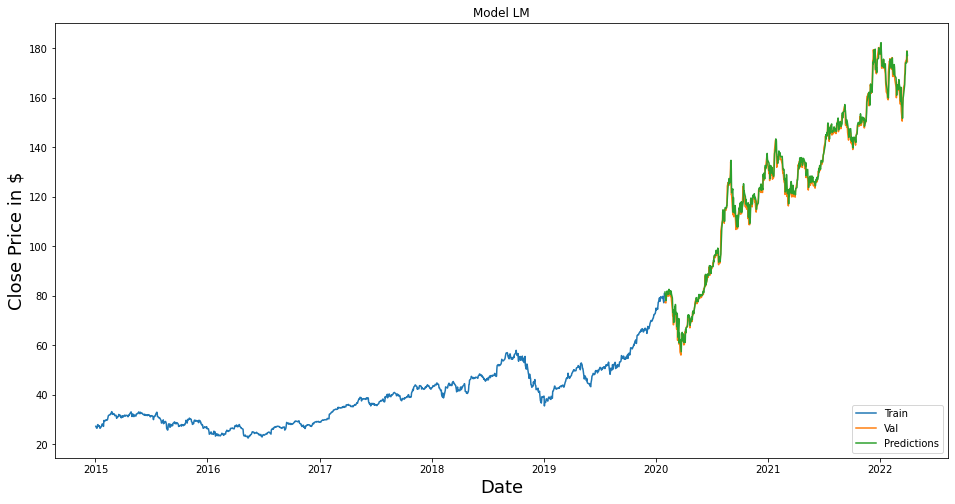

In [17]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model LM')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show

In [18]:
valid

,Close,Predictions
Date,,
2020-01-31,77.377502,81.588402
2020-02-03,77.165001,78.129745
2020-02-04,79.712502,78.293747
2020-02-05,80.362503,80.571983
2020-02-06,81.302498,80.963989
...,...,...
2022-03-25,174.720001,174.127182
2022-03-28,175.600006,174.168839
2022-03-29,178.960007,175.550095
